Gray Level Co-occurence Matrix

Importing lib

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2 as cv
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import graycomatrix, graycoprops
from skimage import io

Patch Size Dec

In [2]:
PATCH_SIZE = 35

reading image

(204, 287)


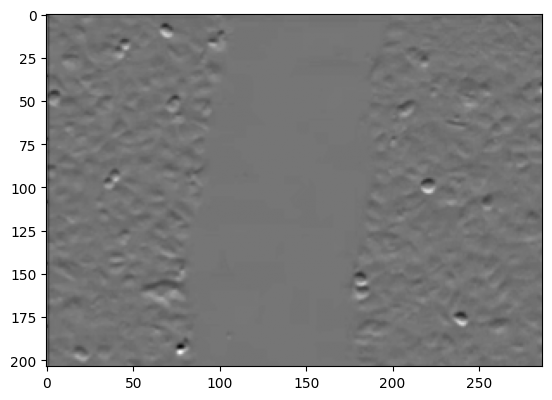

In [7]:
img = io.imread("../../Data/Textures/texture.png")
g_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(g_img,cmap="gray")
print(g_img.shape)

In [8]:
GLCM = graycomatrix(g_img,[1],[0, np.pi/4, np.pi/2, 3*np.pi/4])
a = graycoprops(GLCM,"energy")[0,0]

selecting rough patches

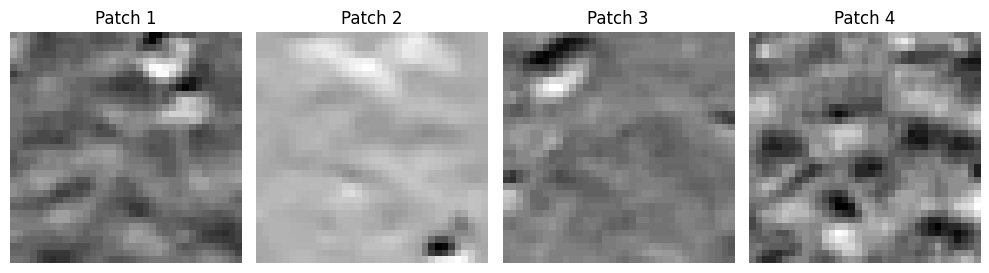

In [25]:
rough_locations = [(50, 50), (160, 50), (50, 200), (125, 220)]
rough_patches = []
for loc in rough_locations:
    rough_patches.append(g_img[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])
    
plt.figure(figsize=(10, 5))  # Width, Height

for i, patch in enumerate(rough_patches):
    plt.subplot(1, len(rough_patches), i+1)  # 1 row, n columns, position i+1
    plt.imshow(patch, cmap='gray')  # assuming g_img is grayscale
    plt.axis('off')
    plt.title(f'Patch {i+1}')

plt.tight_layout()
plt.show()

Displaying smooth patches

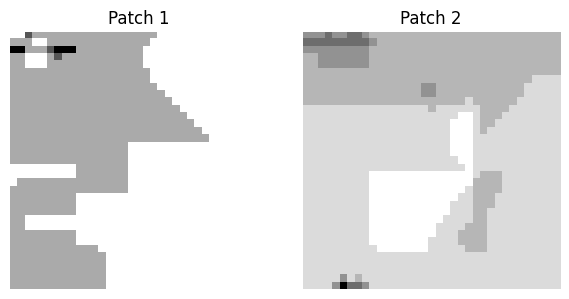

In [23]:
smooth_locations = [(50, 100), (150, 100)]
smooth_patches = []
for loc in smooth_locations:
    smooth_patches.append(g_img[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])
plt.figure(figsize=(6, 3))  # Width, Height

for i, patch in enumerate(smooth_patches):
    plt.subplot(1, len(smooth_patches), i+1)  # 1 row, n columns, position i+1
    plt.imshow(patch, cmap='gray')  # assuming g_img is grayscale
    plt.axis('off')
    plt.title(f'Patch {i+1}')

plt.tight_layout()
plt.show()


In [30]:
diss_sim = []
corr = []
homogen = []
energy = []
contrast = []
for patch in (rough_patches + smooth_patches):
    glcm = graycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    diss_sim.append(graycoprops(glcm, 'dissimilarity')[0, 0]) #[0,0] to convert array to value
    corr.append(graycoprops(glcm, 'correlation')[0, 0])
    homogen.append(graycoprops(glcm, 'homogeneity')[0, 0])
    energy.append(graycoprops(glcm, 'energy')[0, 0])
    contrast.append(graycoprops(glcm, 'contrast')[0, 0])


Visualizing Rough and smooth energy levels and dis similarity

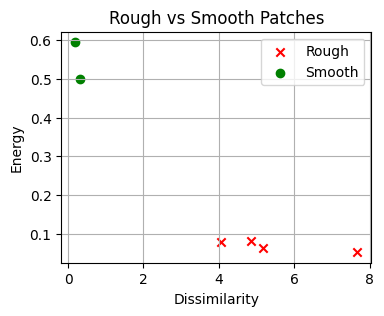

In [33]:
n_rough = len(rough_patches)
n_smooth = len(smooth_patches)

diss_sim = np.array(diss_sim)
energy = np.array(energy)

plt.figure(figsize=(4,3))

plt.scatter(diss_sim[:n_rough], energy[:n_rough], color='red', label='Rough', marker='x')

plt.scatter(diss_sim[n_rough:], energy[n_rough:], color='green', label='Smooth', marker='o')

plt.xlabel('Dissimilarity')
plt.ylabel('Energy')
plt.title('Rough vs Smooth Patches')

plt.legend()
plt.grid(True)

plt.show()


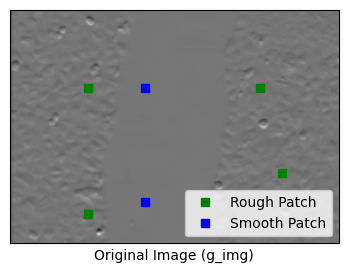

In [34]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(3, 2, 1)  # 3 rows, 2 columns, 1st subplot

# Show the grayscale image
ax.imshow(g_img, cmap=plt.cm.gray, vmin=0, vmax=255)

# Plot Rough patches (Green Squares)
for (y, x) in rough_locations:  
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs', label='Rough Patch')

# Plot Smooth patches (Blue Squares)
for (y, x) in smooth_locations:  
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs', label='Smooth Patch')

# Set label and clean look
ax.set_xlabel('Original Image (g_img)')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# Add legend (only once for rough and smooth)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # remove duplicate labels
ax.legend(by_label.values(), by_label.keys(), loc='lower right')

plt.tight_layout()
plt.show()
